### Importing libraries

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import os
import pywt
import pandas as pd
%matplotlib inline


# importing libraries required for model building and 

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


# importing a library for visualization

import seaborn as sn


# importing libraries to save the ML model and create JSON files

import joblib 
import json


# deep learning packages

import tensorflow as tf
from tensorflow.keras import datasets, layers, models


### Creating a list of all folder names

In [2]:
def list_folders(directory):
    folders = []
    for entry in os.listdir(directory):
        full_path = os.path.join(directory, entry)
        if os.path.isdir(full_path):
            folders.append(entry)
    return folders

# Specify the directory you want to list folders from
directory_path = 'cropped_images/'

# Get the list of folder names
folder_names = list_folders(directory_path)

# folder_names

### Creating a dictionary of player name with all the image paths

In [3]:

# Creating a list of folder names of cropped images

cropped_folder_list = folder_names

folder_path_dict = {'Name':[],
                    'Paths':[]}



for folder_name in cropped_folder_list:
    
    list_1 = []

    folder_path = 'cropped_images'+'/{}'.format(folder_name)

    # Get a list of all files and directories in the specified folder
    files_and_directories = os.listdir(folder_path)

    # Filter only files (not directories) if needed
    files = [f for f in files_and_directories if os.path.isfile(os.path.join(folder_path, f))]

    # Now 'files' contains a list of file names in the folder
    # You can also get the full paths by using os.path.join() on each file name
    file_paths = [os.path.join(folder_path, f) for f in files]
    
    # changing the folder name into a proper name to be used as the dictionary key
    
    original_string = folder_name

    # Split the string based on underscores
    parts = original_string.split('_')

    # Join the first two parts with spaces
    clean_name = ' '.join(parts[:2])


    # Print the file paths
    for file_path in file_paths:
        list_1.append(file_path)
    
    folder_path_dict['Name'].append(clean_name)
    folder_path_dict['Paths'].append(list_1)
    
# folder_path_dict

In [4]:
# check

folder_path_dict['Name']

['alex albon',
 'carlos sainz',
 'charles leclerc',
 'daniel ricciardo',
 'esteban ocon',
 'fernando alonso',
 'george russell',
 'kevin magnussen',
 'lance stroll',
 'lando norris',
 'lewis hamilton',
 'logan sargeant',
 'max verstappen',
 'nico hulkenberg',
 'oscar piastri',
 'pierre gasly',
 'sergio perez',
 'valtteri bottas',
 'yuki tsunoda',
 'zhou guanyu']

### Converting racer names into numeric classes

In [5]:
class_dict = {}

count = 0
for racer_name in folder_path_dict['Name']:
    class_dict[racer_name] = count
    count = count + 1
    
class_dict

{'alex albon': 0,
 'carlos sainz': 1,
 'charles leclerc': 2,
 'daniel ricciardo': 3,
 'esteban ocon': 4,
 'fernando alonso': 5,
 'george russell': 6,
 'kevin magnussen': 7,
 'lance stroll': 8,
 'lando norris': 9,
 'lewis hamilton': 10,
 'logan sargeant': 11,
 'max verstappen': 12,
 'nico hulkenberg': 13,
 'oscar piastri': 14,
 'pierre gasly': 15,
 'sergio perez': 16,
 'valtteri bottas': 17,
 'yuki tsunoda': 18,
 'zhou guanyu': 19}

### Creating a function to print sample images to test out

In [6]:
def get_key_from_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None  # If value is not found in the dictionary

In [7]:
def plot_sample(X,y, dicti,index):
    plt.figure(figsize = (15,3))
    plt.imshow(X[index])
    plt.xlabel(get_key_from_value(dicti,y[index]))

### Creating the X and y variables for model training

In [8]:

X, y = [], []
for racer_name, training_files in zip(folder_path_dict['Name'],folder_path_dict['Paths']):
    for training_image in training_files: 
        # print(racer_name)
        # print(training_image)
        img = cv2.imread(training_image)
        if img is None:
            continue
        
        scaled_raw_img = cv2.resize(img,(64,64))

        # final_img = scaled_raw_img.reshape(32*32*3,1)
        final_img = scaled_raw_img
        
        
        
        X.append(final_img)
        y.append(class_dict[racer_name]) 


### Converting lists to arrays

In [9]:
X = np.array(X)
# X.shape

In [10]:
y = np.array(y)
# y.shape

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# train + split changes the order of the given X and y

In [12]:
X_train.shape

(1421, 64, 64, 3)

In [13]:
y_train.shape

(1421,)

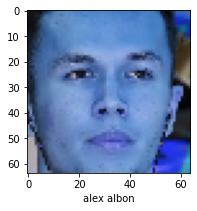

In [14]:
# printing sample picture out
plot_sample(X_train,y_train,class_dict,6)

In [15]:
# break

### Normalizing the X data

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
### Building the convolutional neural network

In [18]:
# creating layers of the neural network

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(20, activation='softmax')
])

In [19]:
# compiling the cnn

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# fitting the cnn model

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
45/45 [==============================] - 5s 79ms/step - loss: 2.9812 - accuracy: 0.0704
Epoch 2/10
45/45 [==============================] - 3s 74ms/step - loss: 2.8310 - accuracy: 0.1358
Epoch 3/10
45/45 [==============================] - 3s 73ms/step - loss: 2.3924 - accuracy: 0.3012
Epoch 4/10
45/45 [==============================] - 4s 86ms/step - loss: 1.7745 - accuracy: 0.5053
Epoch 5/10
45/45 [==============================] - 5s 109ms/step - loss: 1.1827 - accuracy: 0.6524
Epoch 6/10
45/45 [==============================] - 5s 106ms/step - loss: 0.8260 - accuracy: 0.7544
Epoch 7/10
45/45 [==============================] - 5s 121ms/step - loss: 0.5323 - accuracy: 0.8543
Epoch 8/10
45/45 [==============================] - 5s 120ms/step - loss: 0.3397 - accuracy: 0.9156
Epoch 9/10
45/45 [==============================] - 5s 118ms/step - loss: 0.2284 - accuracy: 0.9479
Epoch 10/10
45/45 [==============================] - 5s 112ms/step - loss: 0.1426 - accuracy: 0.9740


In [21]:
# evaluating the cnn model

cnn.evaluate(X_test,y_test)

15/15 [==============================] - 1s 27ms/step - loss: 1.2482 - accuracy: 0.6730


[1.2481563091278076, 0.6729958057403564]

In [22]:
# break

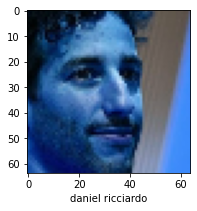

In [45]:
# printing sample picture out
plot_sample(X_test,y_test,class_dict,8)

In [46]:
X_test[8].shape

(64, 64, 3)

### Checking what the model output is

In [49]:
percentages = np.round(cnn.predict(np.expand_dims(X_test[8], axis=0))[0]*100,decimals=2)

converted_array = np.array([("{:.2f}".format(number)) for number in percentages])

print(converted_array)
print(type(converted_array))
print(converted_array.shape)

1/1 [==============================] - 0s 30ms/step
['1.75' '28.13' '1.26' '57.61' '0.00' '0.93' '5.83' '0.00' '0.00' '0.02'
 '1.23' '3.15' '0.03' '0.00' '0.00' '0.01' '0.01' '0.00' '0.00' '0.00']
<class 'numpy.ndarray'>
(20,)


In [51]:
# using argmax to provide the index of the maximum value in each row of the test image

prediction = np.argmax(converted_array)

print(prediction)
print(type(prediction))


3
<class 'numpy.int64'>


In [ ]:
class_dict

In [ ]:
# testing the first five model outputs when run on X_test

# classes[y_classes[3]]